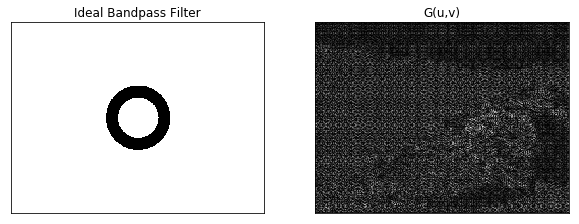

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
from scipy.misc.pilutil import Image

a = cv2.imread('images/moonwalk.jpg',0)
c = np.fft.fft2(a)
d = np.fft.fftshift(c)


u = a.shape[0]
v = a.shape[1]
c1 = u/2
c2 = v/2
dl = 50
dh = 80
#-----------------------------------
#ideal
array1 = np.zeros((u,v))
for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)
        if r > dl and r < dh:
            array1[i,j] = 1
            

#array1=1-array1
convelution1 = array1 * d 
fig = plt.figure(figsize=(10,10))
array1=1-array1
e1 = abs(fftim.ifft2(convelution1))
plt.subplot(121),plt.imshow(array1, cmap = 'gray')
plt.title('Ideal Bandpass Filter'), plt.xticks([]), plt.yticks([])   
plt.subplot(122),plt.imshow(e1, cmap = 'gray')
plt.title('G(u,v)'), plt.xticks([]), plt.yticks([])
plt.show()

In [36]:
#butter
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
import cv2
import numpy as np
from matplotlib import pyplot as plt
a = cv2.imread('images/moonwalk.jpg',0)
c = np.fft.fft2(a)
d = np.fft.fftshift(c)

u = d.shape[0]
v = d.shape[1]
arraylow = numpy.ones((u,v))
arrayheigh = numpy.ones((u,v))
arrayfinal = numpy.ones((u,v))
c1 = u/2 
c2 = v/2

dl=80
dh =50

t2 = 2*1
for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)
        arraylow[i,j] = 1/(1 + (r/dl)**t2)
        arrayheigh[i,j] = 1-(1/(1 + (r/dh)**t2))
        arrayfinal[i,j] =  arraylow[i,j] * arrayheigh[i,j]
        
#----------        
arrayfinal = scipy.misc.toimage(arrayfinal)
       # arrayheigh = scipy.misc.toimage(arrayheigh)
arrayfinal = arraylow * arrayheigh

convolution2 = d * arrayfinal
e2 = abs(fftim.ifft2(convolution2))

fig = plt.figure(figsize=(10,10))

plt.subplot(121),plt.imshow(d, cmap = 'gray')
plt.title('Butterworth Filter'), plt.xticks([]), plt.yticks([])   
plt.subplot(122),plt.imshow(e2, cmap = 'gray')
plt.title('G(u,v)'), plt.xticks([]), plt.yticks([])
plt.show()

TypeError: Image data can not convert to float